# 1. Import Libraries

In [466]:
#Import Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Import libraries for data preprocessing and model creation
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from feature_engine.outliers import Winsorizer
from scipy.stats import pearsonr, kendalltau, spearmanr
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import pickle
import json

# 2. Data Loading

In [467]:
# Data Loading

data = pd.read_csv('train_data.csv')
data

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.738061,0.487707,0.907884,91.17,Cretaceous,Normal polarity,False,0.915951,Conglomerate,Middle,50.65,432.00,43523
1,0.560096,0.341738,1.121302,165.44,Cambrian,Normal polarity,False,0.803968,Limestone,Top,48.85,353.29,44112
2,0.424773,0.218493,0.103855,218.98,Cambrian,Normal polarity,True,0.792441,Shale,Bottom,37.66,371.33,43480
3,0.349958,0.704649,0.383617,51.09,Permian,Normal polarity,True,0.074636,Limestone,Bottom,39.10,232.84,30228
4,0.886811,0.777494,0.593254,313.72,Devonian,Normal polarity,True,1.646640,Shale,Top,90.84,277.67,67217
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,0.049660,0.601750,0.762490,222.54,Jurassic,Reversed polarity,True,2.247495,Sandstone,Bottom,91.69,415.13,26606
4394,0.360085,0.215033,1.002406,276.70,Cretaceous,Reversed polarity,True,1.004584,Conglomerate,Bottom,68.97,121.10,44850
4395,0.464864,0.553313,0.659639,76.77,Devonian,Normal polarity,True,0.721947,Conglomerate,Middle,11.37,288.73,32186
4396,0.803338,0.272392,0.123562,204.82,Neogene,Reversed polarity,True,1.496427,Sandstone,Bottom,132.34,518.31,59888


In [468]:
data.head()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.738061,0.487707,0.907884,91.17,Cretaceous,Normal polarity,False,0.915951,Conglomerate,Middle,50.65,432.00,43523
1,0.560096,0.341738,1.121302,165.44,Cambrian,Normal polarity,False,0.803968,Limestone,Top,48.85,353.29,44112
2,0.424773,0.218493,0.103855,218.98,Cambrian,Normal polarity,True,0.792441,Shale,Bottom,37.66,371.33,43480
3,0.349958,0.704649,0.383617,51.09,Permian,Normal polarity,True,0.074636,Limestone,Bottom,39.10,232.84,30228
4,0.886811,0.777494,0.593254,313.72,Devonian,Normal polarity,True,1.646640,Shale,Top,90.84,277.67,67217


In [469]:
data.tail()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
4393,0.049660,0.601750,0.762490,222.54,Jurassic,Reversed polarity,True,2.247495,Sandstone,Bottom,91.69,415.13,26606
4394,0.360085,0.215033,1.002406,276.70,Cretaceous,Reversed polarity,True,1.004584,Conglomerate,Bottom,68.97,121.10,44850
4395,0.464864,0.553313,0.659639,76.77,Devonian,Normal polarity,True,0.721947,Conglomerate,Middle,11.37,288.73,32186
4396,0.803338,0.272392,0.123562,204.82,Neogene,Reversed polarity,True,1.496427,Sandstone,Bottom,132.34,518.31,59888
4397,0.321577,0.348233,0.265161,436.61,Cretaceous,Normal polarity,True,0.256842,Sandstone,Top,1.70,279.37,40809


In [470]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uranium_lead_ratio          4398 non-null   float64
 1   carbon_14_ratio             4398 non-null   float64
 2   radioactive_decay_series    4398 non-null   float64
 3   stratigraphic_layer_depth   4398 non-null   float64
 4   geological_period           4398 non-null   object 
 5   paleomagnetic_data          4398 non-null   object 
 6   inclusion_of_other_fossils  4398 non-null   bool   
 7   isotopic_composition        4398 non-null   float64
 8   surrounding_rock_type       4398 non-null   object 
 9   stratigraphic_position      4398 non-null   object 
 10  fossil_size                 4398 non-null   float64
 11  fossil_weight               4398 non-null   float64
 12  age                         4398 non-null   int64  
dtypes: bool(1), float64(7), int64(1),

## Check Duplicate Data

In [471]:
# Check Data Duplicates
data.duplicated().sum()

0

## Check Missing Value

In [472]:
# Checking missing values
data.isnull().sum()

uranium_lead_ratio            0
carbon_14_ratio               0
radioactive_decay_series      0
stratigraphic_layer_depth     0
geological_period             0
paleomagnetic_data            0
inclusion_of_other_fossils    0
isotopic_composition          0
surrounding_rock_type         0
stratigraphic_position        0
fossil_size                   0
fossil_weight                 0
age                           0
dtype: int64

## Check Descriptive Statistics of The Numerical Columns

In [473]:
data.describe()

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,isotopic_composition,fossil_size,fossil_weight,age
count,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000
mean,0.486938,0.430116,0.532054,152.832801,0.938315,70.702460,326.655177,40586.656435
std,0.257132,0.233536,0.287929,86.272234,0.521643,37.352584,187.032333,15200.700905
min,0.000241,0.000244,0.000076,0.130000,0.000275,0.130000,0.620000,4208.000000
25%,0.294091,0.246269,0.316775,85.390000,0.533519,42.487500,181.047500,29766.250000
50%,0.473715,0.416046,0.511830,146.000000,0.905684,68.785000,308.260000,39567.000000
75%,0.658012,0.590752,0.723805,211.932500,1.289307,96.440000,455.520000,50550.500000
max,1.533270,1.000000,1.513325,494.200000,3.071434,216.390000,1010.090000,103079.000000


# 3. Exploratory Data Analysis

## Correlation between Features to Determine Fossil Age

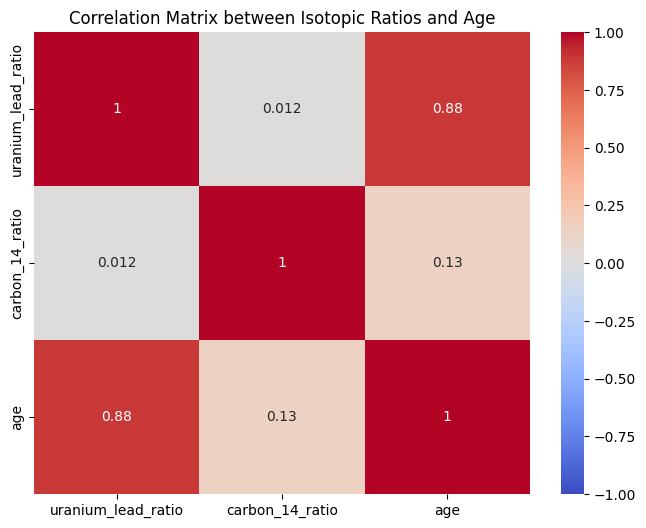

In [474]:
# Compute correlation matrix
correlation_matrix = data[['uranium_lead_ratio', 'carbon_14_ratio', 'age']].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix between Isotopic Ratios and Age')
plt.show()

- Correlation of Uranium-Lead Ratio with Age: The correlation value of 0.88 indicates a very strong relationship between uranium-lead ratio and age. This indicates that as the fossil or rock ages, the uranium-lead ratio also increases significantly, which is in accordance with the basic principles of radiometric dating.

- Correlation of Carbon-14 Ratio with Age: The correlation between carbon-14 ratio and age of 0.13 indicates a weak relationship. Carbon-14 is typically used to date younger objects (up to 50,000 years old), so this low correlation may reflect that older ages do not correlate well with carbon-14 ratios.

- Isotope Interactions: The very low correlation between uranium-lead ratio and carbon-14 ratio (0.012) indicates that these two dating methods do not mask each other, possibly because they are used to date objects on very different time scales (uranium-lead for much older objects than carbon-14).

Overall, this correlation matrix shows that the uranium-lead ratio has a very strong correlation with age, indicating that it is a good indicator for dating older fossils or rocks. In contrast, the carbon-14 ratio has a very low correlation with age in this data, perhaps because this method is better suited to younger objects. The correlation between these two isotope ratios is very low, indicating that they work independently in the context of dating.

## Relationship between Size and Age of Fossils

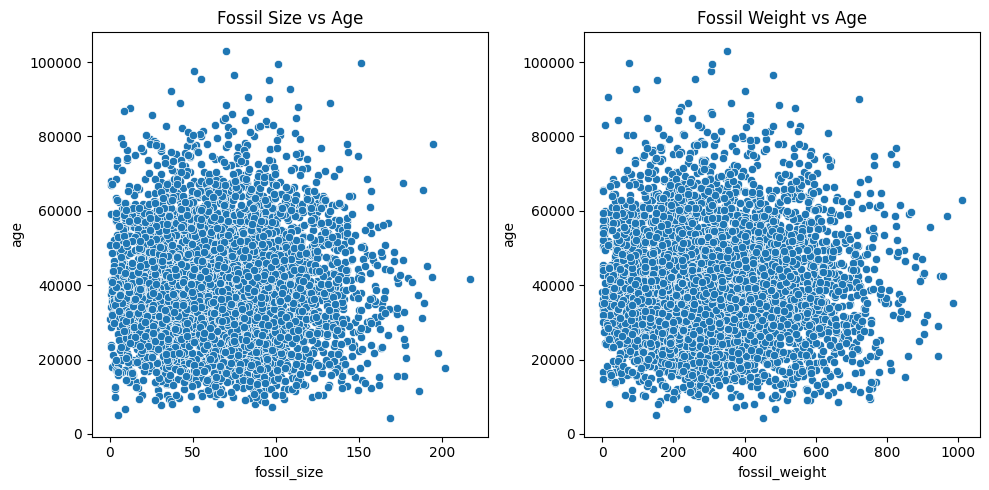

In [475]:
# Scatter plot between fossil_size, fossil_weight, and age
plt.figure(figsize=(10, 5))

# Plot fossil_size vs age
plt.subplot(1, 2, 1)
sns.scatterplot(x='fossil_size', y='age', data=data)
plt.title('Fossil Size vs Age')

# Plot fossil_weight vs age
plt.subplot(1, 2, 2)
sns.scatterplot(x='fossil_weight', y='age', data=data)
plt.title('Fossil Weight vs Age')

plt.tight_layout()
plt.show()

1. Fossil Size vs Age

- Distribution Pattern: From the scatter plot on the left side, there is no clear relationship pattern between fossil size (fossil_size) and fossil age (age). The data points are randomly distributed without showing a strong trend or correlation.
- Interpretation: This shows that fossil size has no significant relationship with fossil age. The large or small size of the fossil cannot be used as a strong predictor to determine the age of the fossil directly.
- Spread: The data distribution appears dense in the age range of 0 to about 100,000 years, and the fossil size varies between 0 and about 200 cm. However, there is no tendency that larger or smaller fossils are associated with a certain age.

2. Fossil Weight vs Age

- Distribution Pattern: Similar to fossil size, the scatter plot on the right shows a random distribution of fossil weight (fossil_weight) and fossil age (age). No linear or non-linear pattern is discernible.
- Interpretation: Fossil weight also does not appear to be significantly correlated with fossil age. Thus, it cannot be concluded that heavier fossils are older or younger.
- Distribution: The distribution of fossil weights varies from 0 to about 1000 grams, and fossil ages are widely distributed with no indication that fossil weight affects age.

Overall, the size and weight of the fossils do not appear to be significantly related to the age of the fossils.

## Patterns Based on Stratigraphy and Geological Layers

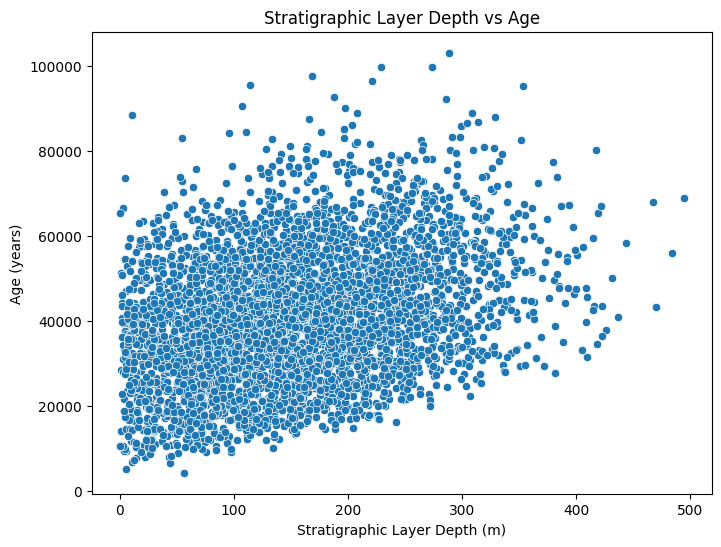

In [476]:
# Scatter plot between stratigraphic_layer_depth and age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='stratigraphic_layer_depth', y='age', data=data)
plt.title('Stratigraphic Layer Depth vs Age')
plt.xlabel('Stratigraphic Layer Depth (m)')
plt.ylabel('Age (years)')
plt.show()


Stratigraphic Layer Depth vs Age

- Distribution Pattern: The scatter plot shows a random distribution of the depth of the fossil within the stratigraphic layer in meters (stratigraphic_layer_depth) and fossil age (age). No linear or non-linear pattern is discernible.

- Interpretation: The depth within the stratigraphic layer does not appear to be significantly correlated with fossil age. Therefore, it cannot be concluded that fossils found at greater depths are necessarily older or younger.

- Distribution: The distribution of Stratigraphic Layer Depth varies from 0 to about 500 meters, and fossil ages are widely distributed with no indication that Stratigraphic Layer Depth affects age.

The relationship between stratigraphic layer depth and fossil age does not show any significant patterns. The scatter plot indicates a random distribution of fossil depth within the stratigraphic layers and fossil ages, with no observable linear or non-linear trends. Fossils found at different depths, ranging from 0 to about 500 meters, do not exhibit any clear correlation with age, which is widely distributed. Consequently, the depth within the stratigraphic layer cannot be reliably used to infer the age of a fossil.

## Patterns Based on Rock and Fossil Types

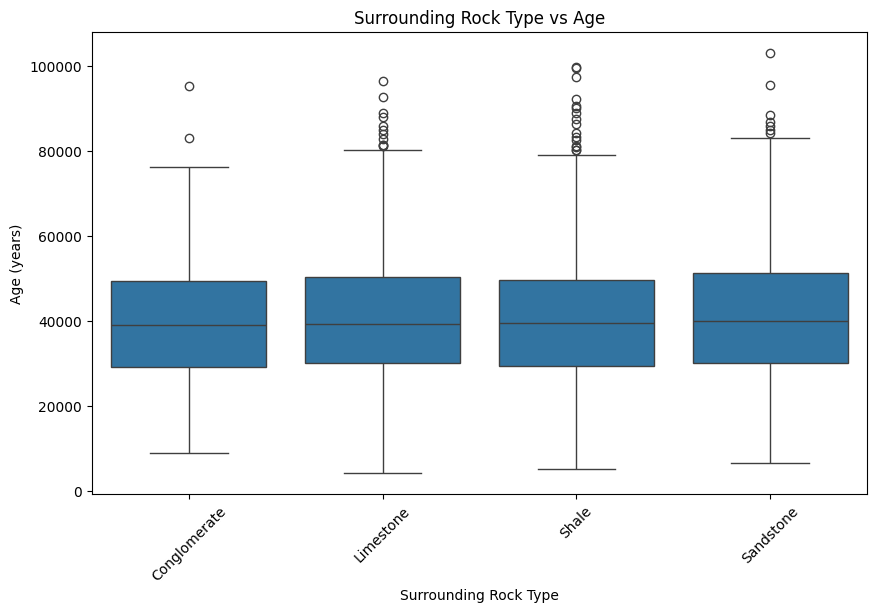

In [477]:
# Boxplot of surrounding_rock_type vs age
plt.figure(figsize=(10, 6))
sns.boxplot(x='surrounding_rock_type', y='age', data=data)
plt.title('Surrounding Rock Type vs Age')
plt.xlabel('Surrounding Rock Type')
plt.ylabel('Age (years)')
plt.xticks(rotation=45)
plt.show()

- Median Age: The median age of the fossils is relatively similar across all rock types, around 40,000-50,000 years old.

- Age Distribution: Shale and Limestone rocks appear to have more outliers at the top, indicating older fossils in these rock types.

- Outliers: Each rock type has an outlier in the 80,000 to 100,000 year age range, indicating fossils that are much older than the normal distribution.

- IQR (Interquartile Range): Shale and Limestone rocks have a smaller IQR range compared to Conglomerate and Sandstone. This could indicate that the ages of fossils in Shale and Limestone are more consistent.

Overall, there is no clear significant difference between rock types in terms of fossil ages. However, we do see that some rock types such as Shale and Limestone tend to contain older fossils (many outliers at older ages).

## Paleomagnetic Data Analysis

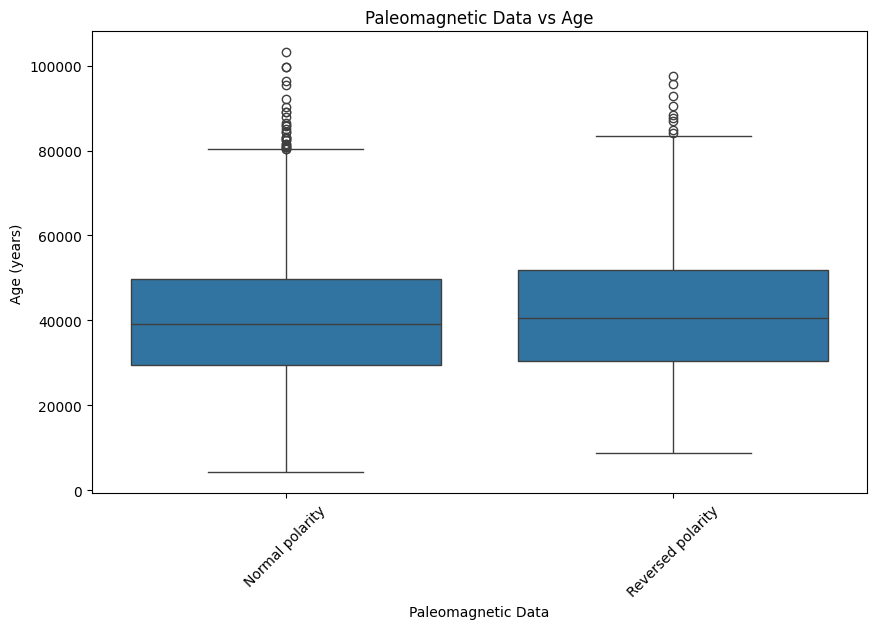

In [478]:
# Boxplot of paleomagnetic_data vs age
plt.figure(figsize=(10, 6))
sns.boxplot(x='paleomagnetic_data', y='age', data=data)
plt.title('Paleomagnetic Data vs Age')
plt.xlabel('Paleomagnetic Data')
plt.ylabel('Age (years)')
plt.xticks(rotation=45)
plt.show()


- Median Age: Both paleomagnetic categories have similar median ages, around 40,000-50,000 years.

- Age Distribution: The age distribution is similar across both categories, but the Normal polarity data appears to have more outliers in the age range above 80,000 years.

- Outliers: There are more outliers in the Normal polarity category than in the Reversed polarity category, suggesting that some very old fossils were found at sites with normal magnetic polarity.

Overall, there is no significant difference between the two paleomagnetic categories in terms of fossil ages. However, the Normal polarity data suggests older fossils, based on the large number of outliers at higher ages.

## Fossil Segmentation Based on Geological Period

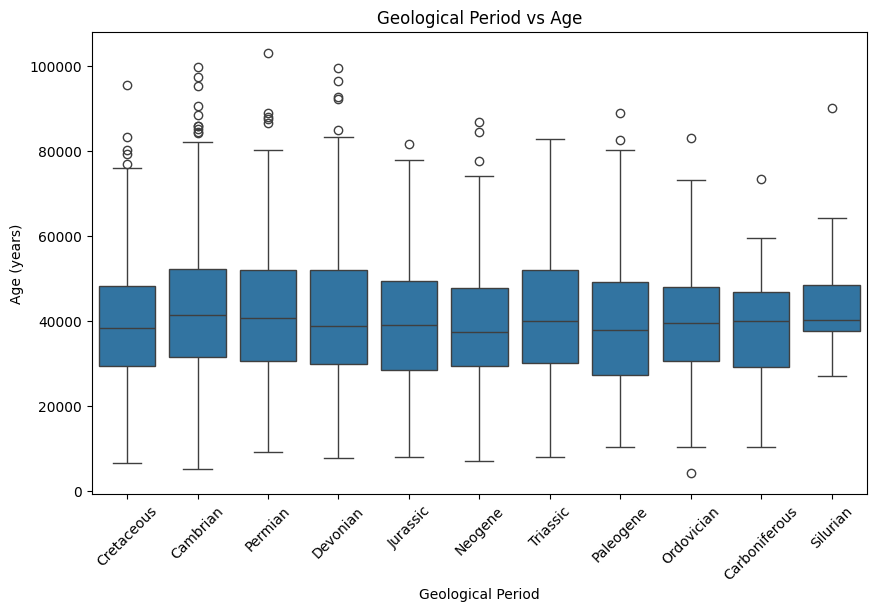

In [479]:
# Boxplot of geological_period vs age
plt.figure(figsize=(10, 6))
sns.boxplot(x='geological_period', y='age', data=data)
plt.title('Geological Period vs Age')
plt.xlabel('Geological Period')
plt.ylabel('Age (years)')
plt.xticks(rotation=45)
plt.show()


- Median Age: The median age of fossils in each geologic period ranges from 40,000 to 50,000 years old. This shows that in general, the median age of fossils is relatively consistent across the geologic periods studied.
- Age Distribution: Some geologic periods, such as the Devonian and Triassic, show a wider age distribution, as seen by longer whiskers and larger box widths. This indicates that the ages of fossils in these periods are more varied. Meanwhile, periods such as the Cambrian and Silurian show a narrower age distribution.
- Outliers: Almost all geologic periods have outliers between 80,000 and 100,000 years old, indicating that there are fossils that are much older than the majority of the data. Periods such as the Cambrian, Ordovician, and Devonian have a higher number of outliers, indicating that there are some very old fossils found in these periods.
- IQR (Interquartile Range): Periods such as the Devonian and Triassic have a larger IQR, indicating a wider variation in ages within these periods. In contrast, periods such as the Carboniferous and Silurian have smaller IQRs, indicating that the fossil ages are more consistent across these periods.

Although there is no significant difference in the median fossil ages across geological periods, some periods such as the Devonian, Triassic, and Cambrian show greater variation in fossil ages, including outliers indicating the presence of very old fossils. Periods such as the Silurian and Carboniferous have a more consistent age distribution. This suggests that despite relatively similar median ages, the variation and presence of older fossils varies across geological periods.

# Feature Engineering

## Checking Cardinality

In [480]:
# Create Column Cardinality Checking Function
def check_column_cardinality(dataframe):
    '''
    This function checks the unique values and checking cardinality status in each column of a given dataset
    
    INPUT: dataframe - the dataset to analyze
    OUTPUT: a table containing columns, the number of unique values in each column, 
            a list of unique values for each column
            the status of cardinality
    '''   
    column_names = list(dataframe.columns)
    unique_counts = []
    unique_values = []
    cardinality_status = []
    
    for column in column_names:
        unique_count = len(dataframe[column].unique())
        unique_counts.append(unique_count)        
        unique_values.append(sorted(dataframe[column].unique().tolist()))
        
        if unique_count > 10:
            cardinality_status.append("High Cardinality")
        else:
            cardinality_status.append("Low Cardinality")
        
    data = {'Column Names': column_names, 
            'Total Unique Values': unique_counts,
            'Unique Values': unique_values,
            'Cardinality Status': cardinality_status}
    
    display(pd.DataFrame(data=data))

In [481]:
# Using Function to Check Columns Cardinality 
check_column_cardinality(data)

,Column Names,Total Unique Values,Unique Values,Cardinality Status
0,uranium_lead_ratio,4398,"[0.0002411924259144, 0.0007843389564916, 0.001...",High Cardinality
1,carbon_14_ratio,4342,"[0.0002438505437448, 0.0002904041063084, 0.001...",High Cardinality
2,radioactive_decay_series,4398,"[7.56371812158374e-05, 0.0009402033404315, 0.0...",High Cardinality
3,stratigraphic_layer_depth,4086,"[0.13, 0.34, 0.66, 1.0, 1.01, 1.27, 1.39, 1.52...",High Cardinality
4,geological_period,11,"[Cambrian, Carboniferous, Cretaceous, Devonian...",High Cardinality
5,paleomagnetic_data,2,"[Normal polarity, Reversed polarity]",Low Cardinality
6,inclusion_of_other_fossils,2,"[False, True]",Low Cardinality
7,isotopic_composition,4398,"[0.0002749630652936, 0.0005099785180253, 0.001...",High Cardinality
8,surrounding_rock_type,4,"[Conglomerate, Limestone, Sandstone, Shale]",Low Cardinality
9,stratigraphic_position,3,"[Bottom, Middle, Top]",Low Cardinality


## Splitting Between Train-set and Test-set

In [482]:
# Split between X & Y

X = data.drop('age', axis = 1)
y = data['age']
X

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight
0,0.738061,0.487707,0.907884,91.17,Cretaceous,Normal polarity,False,0.915951,Conglomerate,Middle,50.65,432.00
1,0.560096,0.341738,1.121302,165.44,Cambrian,Normal polarity,False,0.803968,Limestone,Top,48.85,353.29
2,0.424773,0.218493,0.103855,218.98,Cambrian,Normal polarity,True,0.792441,Shale,Bottom,37.66,371.33
3,0.349958,0.704649,0.383617,51.09,Permian,Normal polarity,True,0.074636,Limestone,Bottom,39.10,232.84
4,0.886811,0.777494,0.593254,313.72,Devonian,Normal polarity,True,1.646640,Shale,Top,90.84,277.67
...,...,...,...,...,...,...,...,...,...,...,...,...
4393,0.049660,0.601750,0.762490,222.54,Jurassic,Reversed polarity,True,2.247495,Sandstone,Bottom,91.69,415.13
4394,0.360085,0.215033,1.002406,276.70,Cretaceous,Reversed polarity,True,1.004584,Conglomerate,Bottom,68.97,121.10
4395,0.464864,0.553313,0.659639,76.77,Devonian,Normal polarity,True,0.721947,Conglomerate,Middle,11.37,288.73
4396,0.803338,0.272392,0.123562,204.82,Neogene,Reversed polarity,True,1.496427,Sandstone,Bottom,132.34,518.31


In [483]:
# Splitting between train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Train_size: ' , X_train.shape)
print('Test_size: ' , X_test.shape)

Train_size:  (3518, 12)
Test_size:  (880, 12)


## Handling Outlier

In [484]:
# Filer Numerical Columns in X train
numeric_columns = X_train.select_dtypes(include=np.number).columns.to_list()

# Skewed columns container
skewed_numeric_data = []
skewed_numeric_columns = []

# Normal distribution columns container
normal_numeric_data = []
normal_numeric_columns = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for column in numeric_columns:
    skewness = X_train[column].skew()
    # If Normal distribution
    if skewness <= 0.5 and skewness >= -0.5:
        normal_numeric_columns.append(column)
        normal_numeric_data.append([column, skewness])
    # If Skewed distribution
    elif skewness < -0.5 or skewness > 0.5:
        skewed_numeric_columns.append(column)
        skewed_numeric_data.append([column, skewness])

In [485]:
# Showing all columns with normal distribution and each skewness
pd.DataFrame(data=normal_numeric_data, columns=['Normal Distributed Columns', 'Skewness'])

,Normal Distributed Columns,Skewness
0,uranium_lead_ratio,0.356665
1,carbon_14_ratio,0.314334
2,radioactive_decay_series,0.372447
3,stratigraphic_layer_depth,0.482378
4,isotopic_composition,0.415216
5,fossil_size,0.325549
6,fossil_weight,0.456715


The skewness values for all columns are positive, indicating a general tendency for data to be skewed towards lower values. The skewness ranges from mild to moderate, suggesting that while the distributions are not perfectly symmetric, they are not highly skewed either. Most columns exhibit a slight to moderate positive skewness.

In [486]:
# Showing all columns with skewed distribution and each skewness
pd.DataFrame(data=skewed_numeric_data, columns=['Skewed Distributed Columns', 'Skewness'])

,Skewed Distributed Columns,Skewness


There is no Skewed Distributed Columns

In [487]:
# Capping Method for Normal Distribution  
winsorizer_normal_distribution = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=normal_numeric_columns,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_normal_distribution.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_normal_distribution.transform(X_test)

Using Gaussian distribution to calculate the limits, since we don't have Skewed Distributed Columns we don't need IQR method

In [488]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    This function is created to plot histograms and boxplots for a variable before and after outlier handling
    
    Parameters:
    - df_before (pandas.DataFrame): DataFrame before outlier handling
    - df_after (pandas.DataFrame): DataFrame after outlier handling
    - variable (str): The variable to plot
    
    Example: 
    num_cols = ['numeric_column']                                   <- Enter the numeric column
    for col in num_cols:                                            <- make a for loop in numeric column to access every columns
        plot_distribution_comparison(X_train, X_train_capped, col)  <- put X_train, X_train_capped, and columns in the variable

    """
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

The function above visualizes the data before and after capping outliers using the selected method. It displays both the histogram and the box plot for each numerical feature.

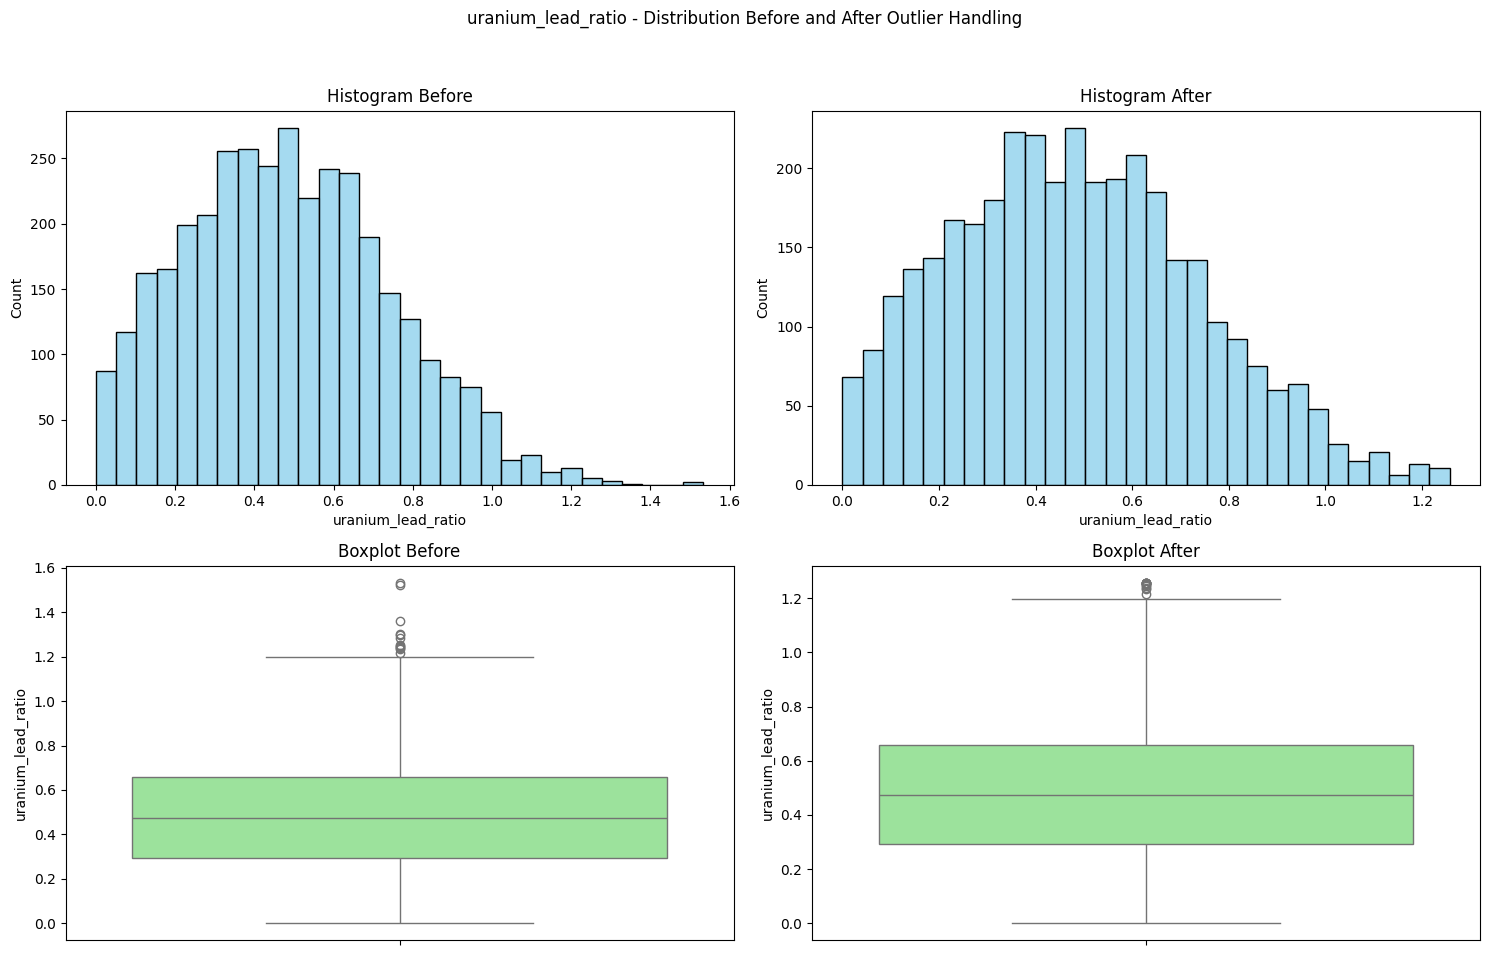

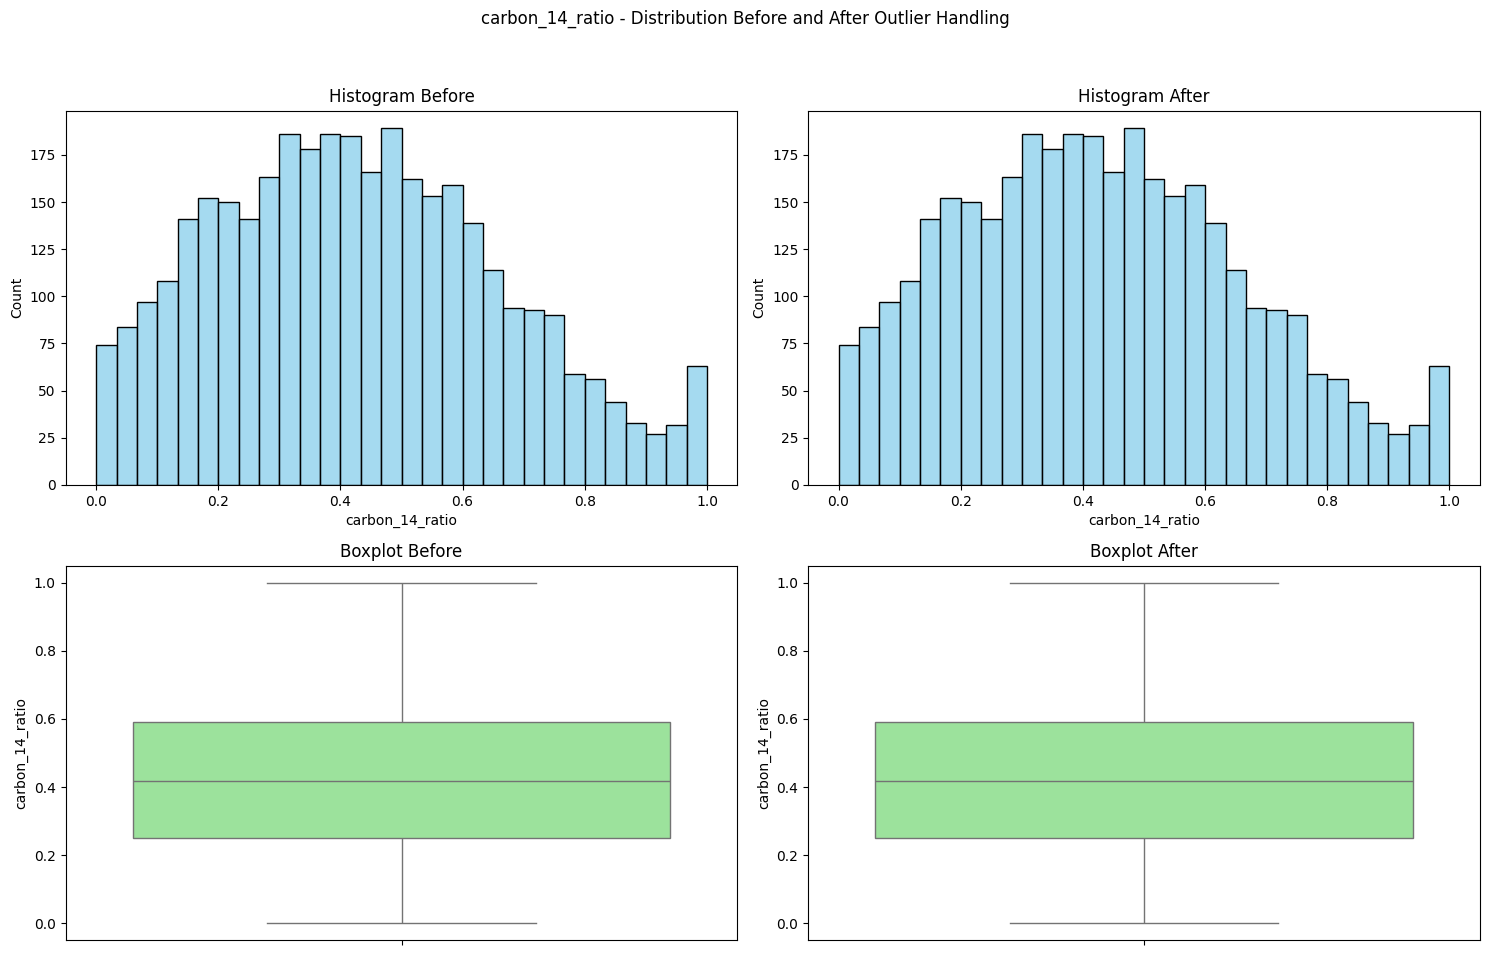

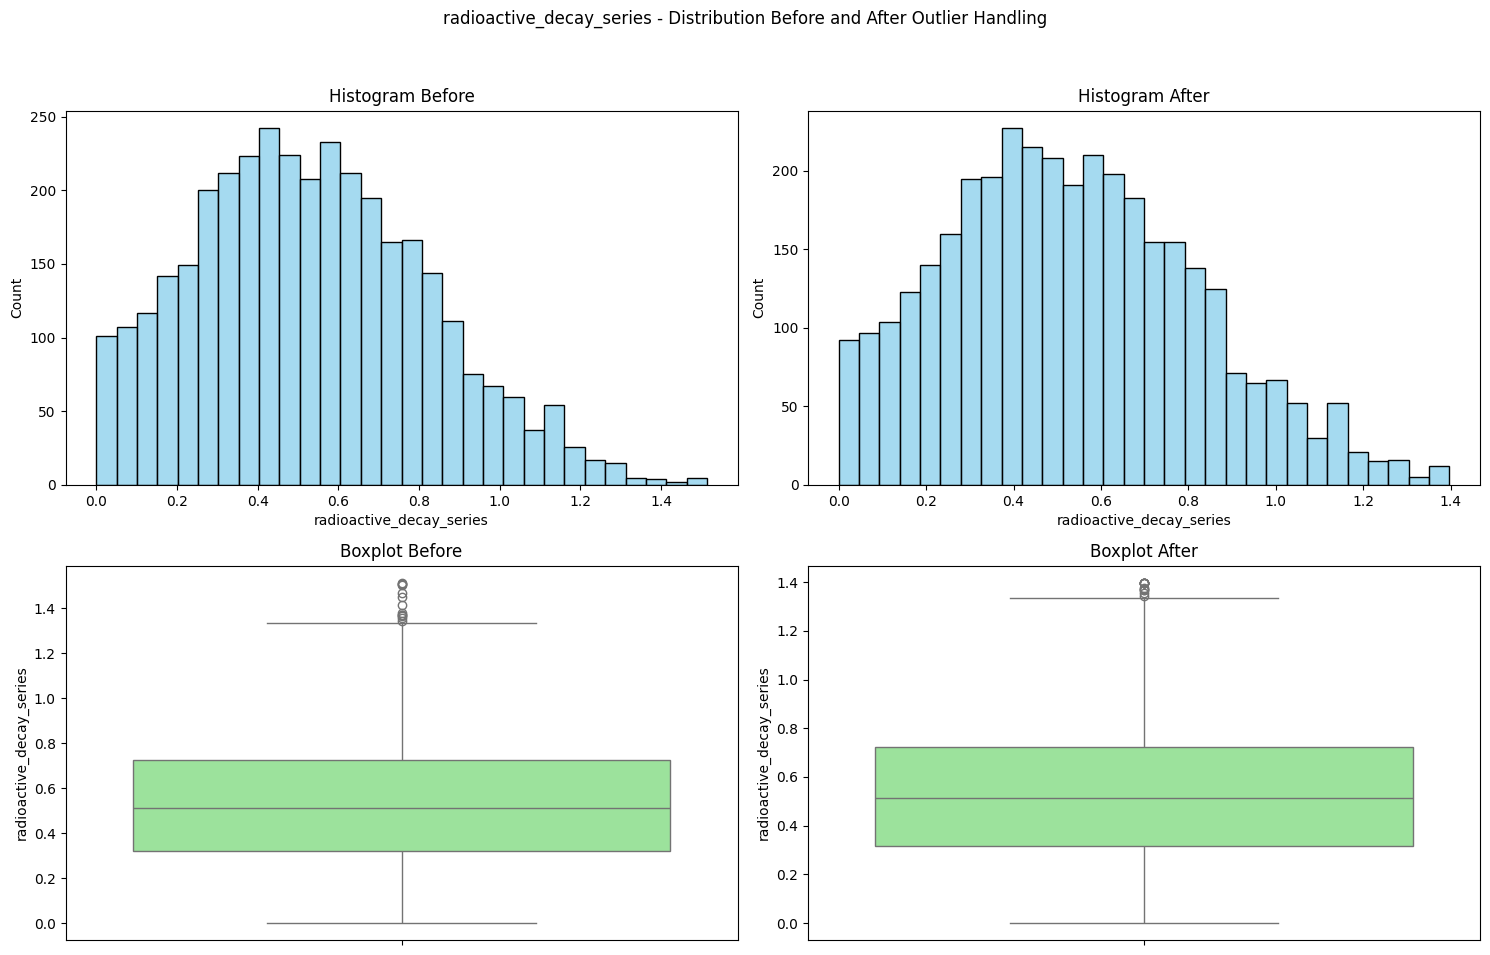

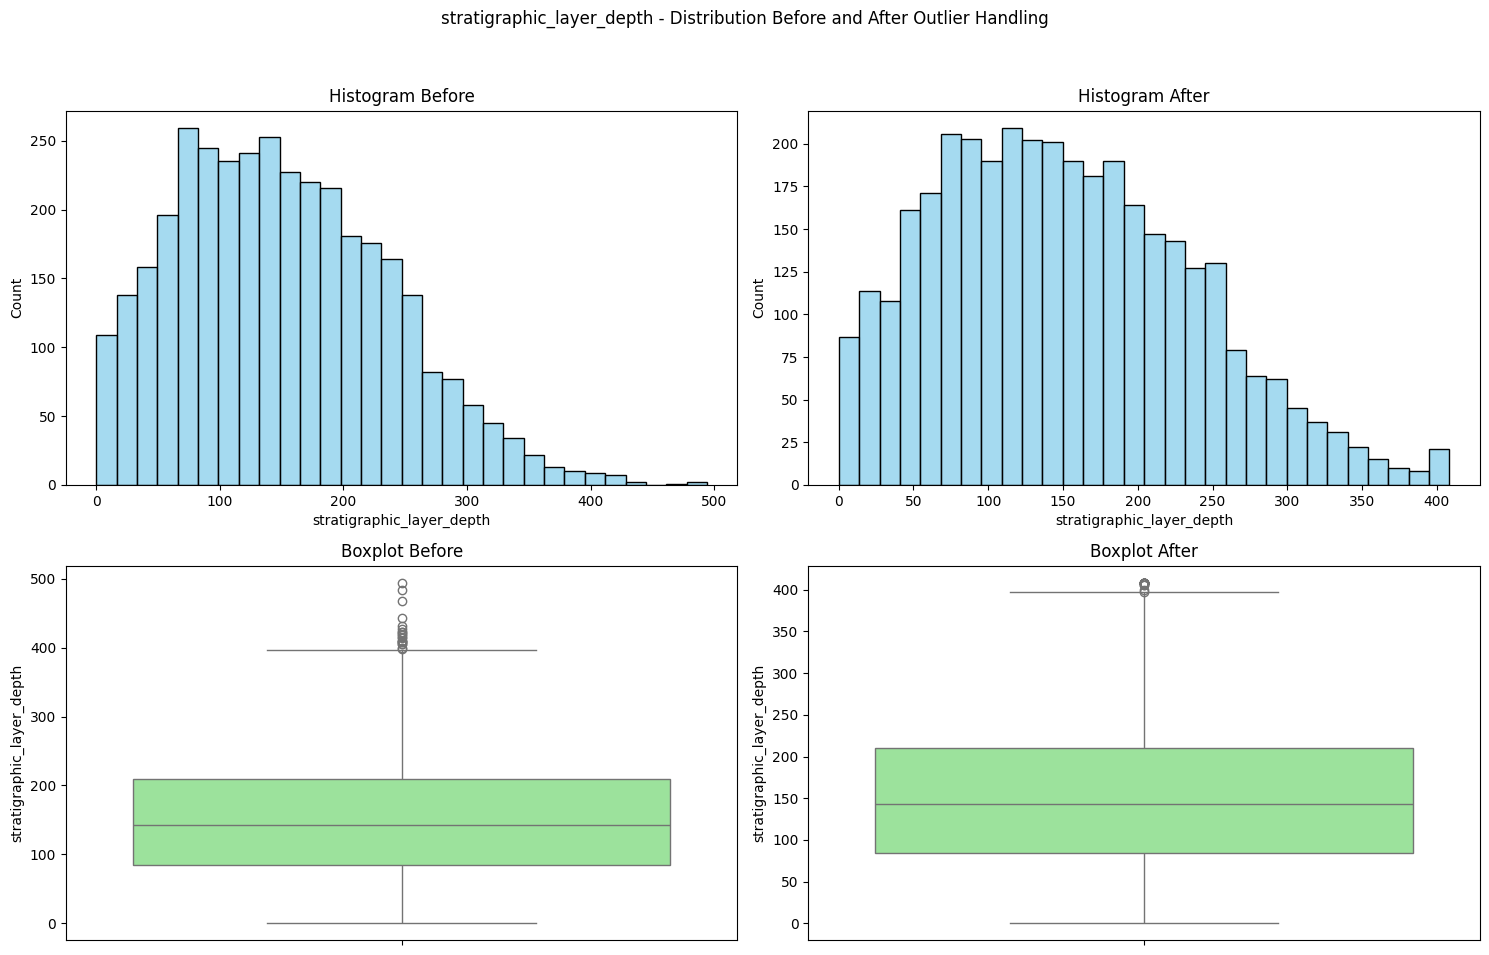

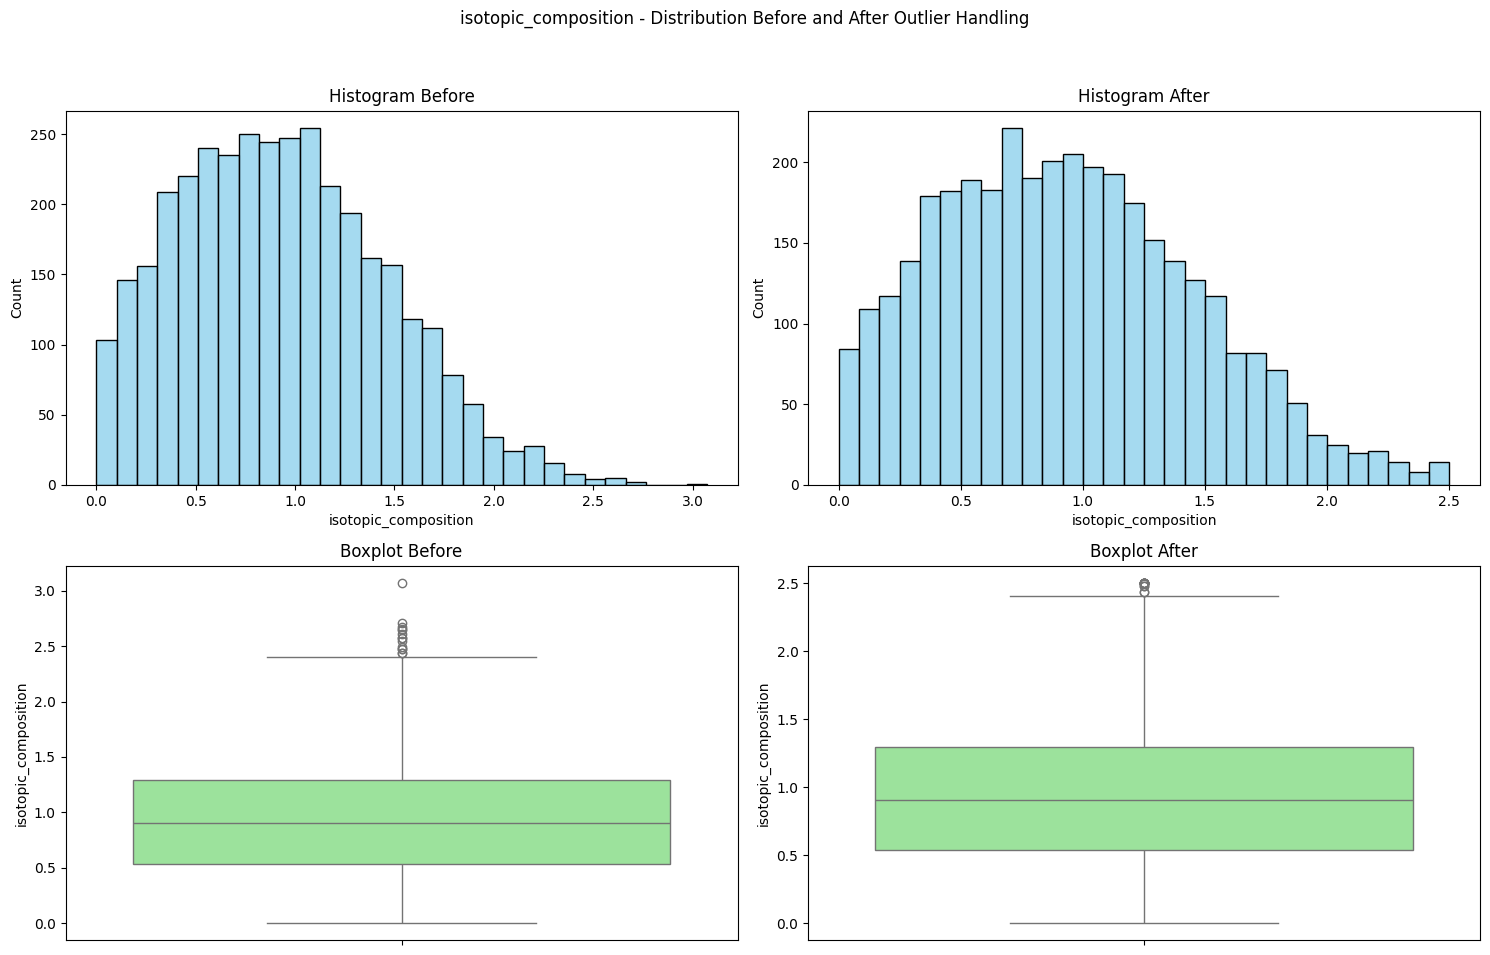

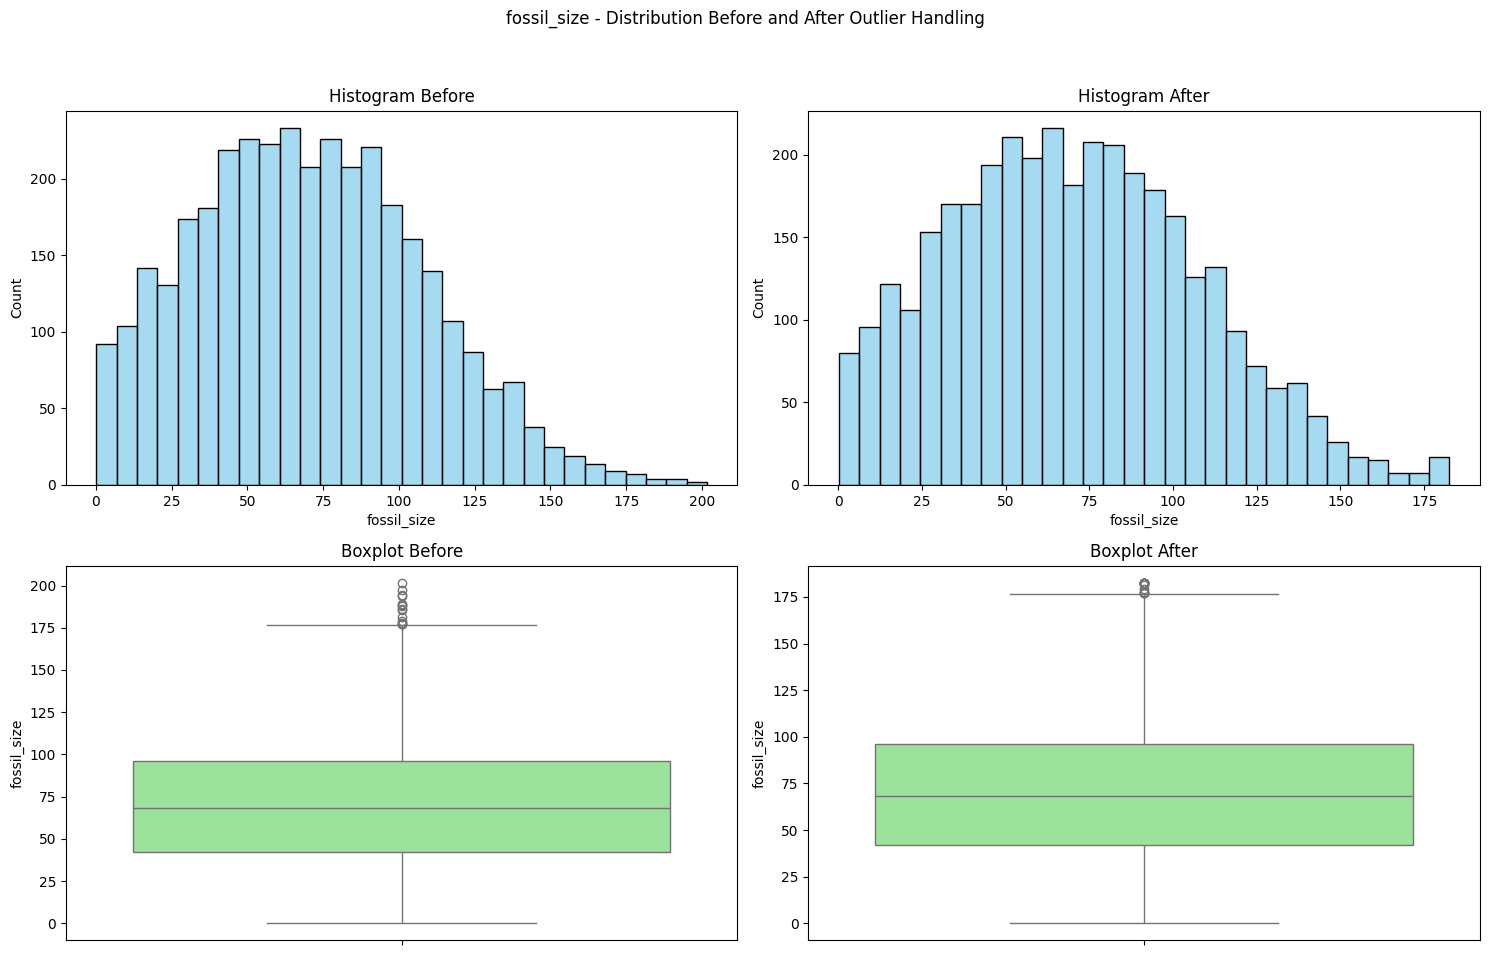

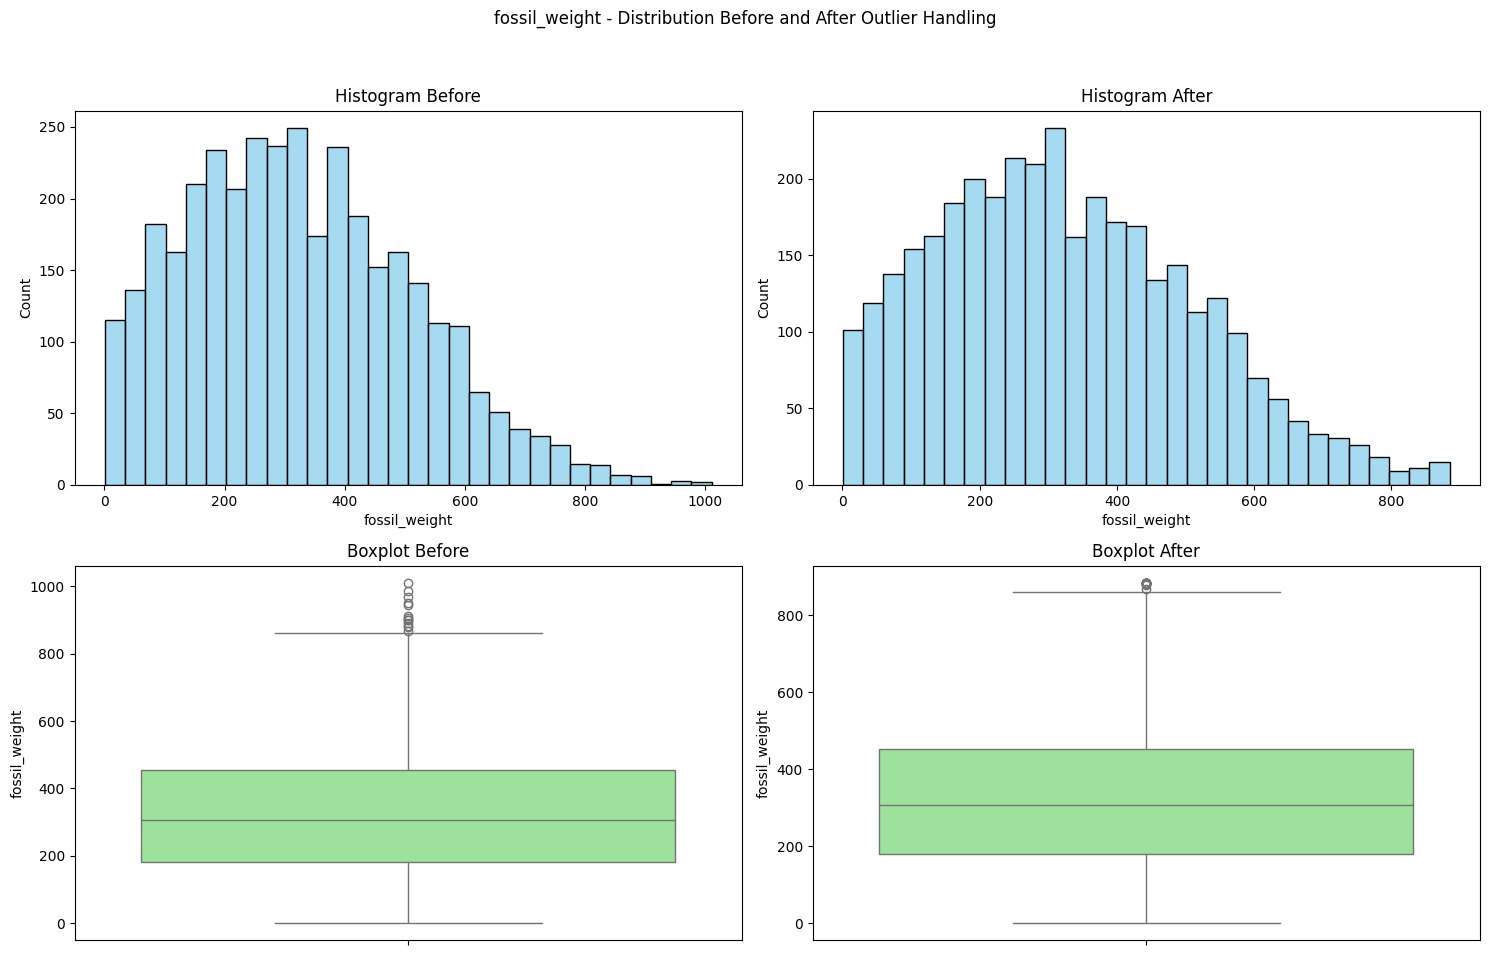

In [489]:
# Using the Function
num_cols = numeric_columns 
for col in num_cols:
    outlier_handling_plot_comparison(X_train, X_train_capped, col)

Showing the distribution of the variable before and after handling outlier

## Split Between Numerical Columns and Categorical Columns

In [490]:
# Get numeric and categorical column

num_columns = X_train_capped.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_capped.select_dtypes(include=['object']).columns.tolist()

In [491]:
print('Categorical Columns :', cat_columns)
print('Numerical Columns :', num_columns)

Categorical Columns : ['geological_period', 'paleomagnetic_data', 'surrounding_rock_type', 'stratigraphic_position']
Numerical Columns : ['uranium_lead_ratio', 'carbon_14_ratio', 'radioactive_decay_series', 'stratigraphic_layer_depth', 'isotopic_composition', 'fossil_size', 'fossil_weight']


In [492]:
# Pengelompokkan categorical dan numerical pada data X_train dan X_test yang telah di capping 
X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]

X_test_num = X_test_capped[num_columns]
X_test_cat = X_test_capped[cat_columns]

## Feature Selection

### Categorical Features

In [493]:
#Finding the correlation between categorical columns and 'price' using Kendall Tau's correlation

p_values = []
interpretation = []
cols = []
corr = []


for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  if p_value < 0.05:
    interpretation.append('Significant Correlation')
  else :
    interpretation.append('No Significant Correlation')

dfcorr = pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

dfcorr

,Column Name,Correlation Coefficient,P-value,Interpretation
0,geological_period,-0.011776,3.234475e-01,No Significant Correlation
1,paleomagnetic_data,0.032302,1.898320e-02,Significant Correlation
2,surrounding_rock_type,0.009892,4.343775e-01,No Significant Correlation
3,stratigraphic_position,-0.162613,2.037689e-34,Significant Correlation


- Only paleomagnetic_data and stratigraphic_position show significant correlation. The correlation with paleomagnetic_data is very weak, while with stratigraphic_position it is stronger.
- Geological_period and surrounding_rock_type do not show statistically significant correlation with other variables.

In [494]:
# extract data
corrCat = (dfcorr[dfcorr['Interpretation']=='Significant Correlation'])
list_corrCat = list(corrCat['Column Name'].values)

Extract the columns that show significant correlation with the target variable.

### Numerical Features

In [495]:
#Finding the correlation between numerical columns and 'price' using pearsonr and spearmanr correlation

p_values = []
interpretation = []
cols = []
corr = []

for col in X_train_num.columns:
  if abs(X_train_num[col].skew()) < 0.5:                    #For Normally Distributed Columns
    corr_coef, p_value = pearsonr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')
  else:                                                     #For Non Normally Distributed Columns
    corr_coef, p_value = spearmanr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')

dfcorrnum = pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })
dfcorrnum

,Column Name,Correlation Coefficient,P-value,Interpretation
0,uranium_lead_ratio,0.885870,0.000000e+00,Significant Correlation
1,carbon_14_ratio,0.129005,1.577882e-14,Significant Correlation
2,radioactive_decay_series,0.121405,5.009161e-13,Significant Correlation
3,stratigraphic_layer_depth,0.330167,3.058015e-90,Significant Correlation
4,isotopic_composition,0.006635,6.940225e-01,No Significant Correlation
5,fossil_size,-0.020593,2.220343e-01,No Significant Correlation
6,fossil_weight,0.002756,8.702180e-01,No Significant Correlation


- The uranium_lead_ratio, carbon_14_ratio, radioactive_decay_series, and stratigraphic_layer_depth columns show significant correlations with the target variables. The relationships with uranium_lead_ratio and stratigraphic_layer_depth are the strongest.
- The isotopic_composition, fossil_size, and fossil_weight columns do not show significant correlations with the target variables.

In [496]:
# extract data
corrNum = dfcorrnum[dfcorrnum['Interpretation'] == 'Significant Correlation']
list_corrNum = list(corrNum['Column Name'].values)

Extract the columns that show significant correlation with the target variable.

### Creating New Variable for Saving the Correlation Feature

In [497]:
# Membuat dataframe Categorical & Numerical
selected_cat_col = list_corrCat
selected_num_col = list_corrNum


X_train_cat = X_train_cat[selected_cat_col]
X_train_num = X_train_num[selected_num_col]

X_test_cat = X_test_cat[selected_cat_col]
X_test_num = X_test_num[selected_num_col]

In [498]:
# # Concatenate numerical and categorical features along columns (axis=1)
# X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
# # Concatenate numerical and categorical features along columns (axis=1)
# X_test_final = pd.concat([X_test_num, X_test_cat], axis=1)

## Scaling and Encoding

### Scaling

In [499]:
#Initialize the StandardScaler
scaler = StandardScaler()

#Fit_transform for X_train, transform for X_test
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[-0.70319934, -0.82108918, -0.01867161,  0.75996261],
       [ 1.08572056, -1.58458303, -1.58420632, -0.93525308],
       [-0.72392563, -0.42421713,  0.66666958,  0.27866148],
       ...,
       [-1.86616025, -0.32177407, -1.85274373,  0.29834468],
       [-0.24352104, -1.17966701,  0.9824111 ,  0.93734574],
       [ 2.0482583 ,  1.36179414, -0.54629231, -0.31300617]])

We used StandardScaler because the data distribution is close to normal and none of the features are skewed. StandardScaler normalizes by reducing the data to a mean of 0 and a standard deviation of 1, which is consistent with the assumption that the data is in a normal distribution. By using StandardScaler, I ensure that each feature is on a uniform scale and allows the machine learning algorithm to perform optimally without having to deal with any irregularities or imbalances in the feature scales."

### Encoding

In [500]:
#Initialize the OneHotEncoder

# Initialize the OneHotEncoder with handle_unknown='ignore'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

#Fit_transform for X_train, transform for X_test
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_cat_encoded

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0.],
       ...,
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0.]])

We used OneHotEncoder because the selected categorical columns, such as `paleomagnetic_data` and `stratigraphic_position`, have few unique categories. OneHotEncoder converts each category into a binary column (0 or 1), which allows machine learning algorithms to process categorical data in a numeric format. With few categories, OneHotEncoder can efficiently create a binary column for each category without creating a dimension explosion. This ensures that each category is treated independently and avoids ordinal assumptions that may not hold for my data. This method helps the algorithm understand and process categorical features in an appropriate manner.

### Concatenate

In [501]:
# Concate
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis = 1)

# Transform into dataframe
X_train_final = pd.DataFrame(X_train_final)
X_test_final = pd.DataFrame(X_test_final)

Merge the normalized numeric features and encoded categorical features into one array for both training and testing data.

# Model Creation

After completing Feature Engineering, the next process is defining the model. The chosen model is Linear Regression, and the evaluation metrics include `MAE (Mean Absolute Error)`, `RMSE (Root Mean Squared Error)`, `MSE (Mean Squared Error)`, and `R-squared score (r2 score)`.

- `Linear Regression` is used because it's a simple yet effective model for predicting numerical values based on linear relationships within the data. It's particularly suitable when the relationship between features and target variables is approximately linear. This decision is based on noticing a direct correlation in the data between the features and the target variable, which makes Linear Regression an appropriate selection.

- `MAE` is used because it provides a measure of the average of errors in predictions, giving equal weight to all errors regardless of their direction. This metric is valuable for understanding the typical error in the model's predictions and is straightforward to interpret.

- `MSE` is used because it punishes larger errors more than MAE, making it more sensitive to outliers. This metric is beneficial when emphasizing the impact of larger errors on the overall model performance.

- `RMSE` is used because it gives a measure of the average magnitude of error in predictions, with larger errors having a greater impact due to the square term. This metric is valuable for understanding the spread of errors in the model's predictions. Its easier to understand rather than MSE.

- `R2 score` is used because it provides an indication of how well the model fits the data by comparing the variance explained by the model to the total variance in the data. A higher r2 score indicates a better fit of the model to the data, making it a crucial metric for evaluating model performance and goodness of fit.

## Model Definition

In [502]:
lr = LinearRegression()
lr

LinearRegression()

## Model Training

In [503]:
lr.fit(X_train_final, y_train)

LinearRegression()

## Model Evaluation

Once the model has been trained, the next step involves comparing the predictions generated using the training data (X_train_final) with those from the testing data (X_test_final). This comparison helps evaluate how well the model generalizes to unseen data.

### Linear Regression

In [504]:
# Predict Train-set dan Test-set
y_pred_train_lr = lr.predict(X_train_final)
y_pred_test_lr = lr.predict(X_test_final)

In [505]:
# Show comparison
comparison = {'Actual Age': y_test,
              'Predicted Age': y_pred_test_lr}

pd.DataFrame(comparison)

,Actual Age,Predicted Age
1720,41202,41460.993891
1108,47076,47011.142227
2821,64535,61972.791111
3677,24729,25151.260419
1862,42863,48029.609079
...,...,...
289,28130,27436.781306
1022,43732,40924.849388
1117,30019,31938.566142
4148,54898,57517.763213


These comparisons often reveal variances, with some predictions being close to the actual values while others differs significantly.

To provide a clearer evaluation, loss or cost functions measure this difference, offering a numerical measure of model accuracy. Evaluating metrics for both training and testing datasets provides insights into the model's generalization and prediction capabilities.

In [506]:
# # Ignore the specific FutureWarning raised by the 'squared' parameter in mean_squared_error
# warnings.simplefilter(action='ignore', category=FutureWarning)

# Calculate metrics
metrics_lr = {
    "MAE": {
        "Train Set": round(mean_absolute_error(y_train, y_pred_train_lr),2),
        "Test Set": round(mean_absolute_error(y_test, y_pred_test_lr),2)
    },
    "MSE": {
        "Train Set": round(mean_squared_error(y_train, y_pred_train_lr),2),
        "Test Set": round(mean_squared_error(y_test, y_pred_test_lr),2)
    },
    "RMSE": {
        "Train Set": round(np.sqrt(mean_squared_error(y_train, y_pred_train_lr)), 2),
        "Test Set": round(np.sqrt(mean_squared_error(y_test, y_pred_test_lr)), 2)
    },
    "R2 Score": {
        "Train Set": round(r2_score(y_train, y_pred_train_lr),2),
        "Test Set": round(r2_score(y_test, y_pred_test_lr),2)
    }
}

# Convert dictionary to DataFrame
metrics_lr_df = pd.DataFrame(metrics_lr)

# Print the table
metrics_lr_df

,MAE,MSE,RMSE,R2 Score
Train Set,1823.87,5390508.13,2321.75,0.98
Test Set,1810.59,5140899.70,2267.36,0.98


- MAE (Mean Absolute Error):
A lower MAE indicates that the model has better accuracy in predicting values. The MAE result for the training set is 1823.87, and for the test set, it is 1810.59, showing that the model has a similar average absolute error between the training and test datasets.

- MSE (Mean Squared Error):
A lower MSE indicates better model performance. The MSE result for the training set is 5390508.13, and for the test set, it is 5140899.70. The lower MSE on the test set suggests that the model might generalize better to unseen data compared to the training data.

- RMSE (Root Mean Squared Error):
RMSE provides an easily interpretable measure of the average prediction error. The RMSE result for the training set is 2321.75, and for the test set, it is 2267.36. The similar RMSE values indicate that the model's performance is consistent across both datasets.

- R2 Score (Coefficient of Determination):
An R2 Score close to 1 means the model explains most of the variance in the data. The R2 Score result is 0.98 for both the training and test sets, indicating that the model is very good at explaining the variance in both datasets.

Overall, the model shows excellent performance with similar MAE, MSE, and RMSE values for both the training and test sets, and a very high R2 Score for both. This indicates that the model performs well not only on the training data but also generalizes effectively to new, unseen data.

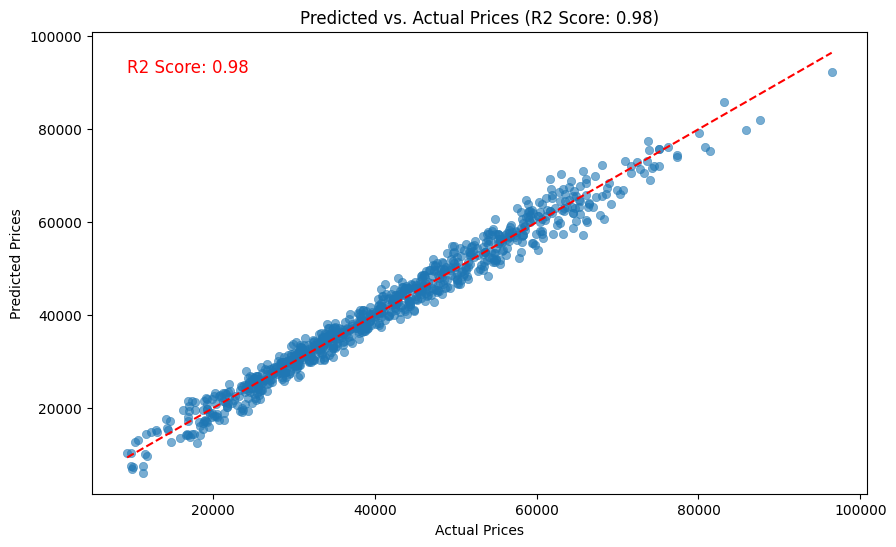

In [507]:
# Calculate R2 score for annotation
r2 = round(r2_score(y_test, y_pred_test_lr), 2)

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_test_lr, alpha=0.6, edgecolor=None)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

# Add titles and labels
plt.title(f'Predicted vs. Actual Prices (R2 Score: {r2})')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Add R2 score text within the plot for clarity
plt.text(x=min(y_test), y=max(y_pred_test_lr), s=f'R2 Score: {r2}', fontsize=12, color='red')

# Show the plot
plt.show()

Looking at the scatterplot:

- Prediction Fit: The data points are spread very close to the regression line, indicating that the prediction model is very accurate. The closer the points are to the line, the better the model is performing in predicting actual prices.

- R2 Score: An R2 score of 0.98 indicates that 98% of the variation in the actual price data can be explained by the prediction model. This is a very high value, indicating that the model is performing very well and making only a few prediction errors.

- Distribution Outliers: While most of the points are close to the regression line, there are a few points that deviate slightly from the line, especially at higher prices. This could indicate that the model may have a little difficulty predicting very high prices or that there may be variations in the data at those prices that are not fully captured by the model.

### Compare to Other Models

To understand how different models perform and how their parameters impact predictions, let's compare linear regression, ridge regression, and lasso regression. Evaluating their respective scores and metrics like MAE, RMSE, MSE, and R2 provides insights into the differences in predictive accuracy and model performance.

In [508]:
# Create function to evaluate model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    return mae_train, mae_test, rmse_train, rmse_test, mse_train, mse_test, r2_train, r2_test

# Create function to find the best model and parameters
def grid_search(X_train, y_train, X_test, y_test):
    model = {
        'Linear Regression': {
            'model': LinearRegression(),
            'params': {}
        },
        'Ridge Regression': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 1.0, 10.0],
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
            }
        },
        'Lasso Regression': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        }
    }

    results = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)
    for algorithm, config in model.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X_train, y_train)

        mae_train, mae_test, rmse_train, rmse_test, mse_train, mse_test, r2_train, r2_test = evaluate_model(gs.best_estimator_, X_train, y_train, X_test, y_test)
        
        results.append({
            'model': algorithm,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
            'MAE_train': mae_train,
            'MAE_test': mae_test,
            'RMSE_train': rmse_train,
            'RMSE_test': rmse_test,
            'MSE_train': mse_train,
            'MSE_test': mse_test,
            'R2_train': r2_train,
            'R2_test': r2_test
        })

    return pd.DataFrame(results, columns=['model', 'best_score', 'best_params', 'MAE_train', 'MAE_test', 'RMSE_train', 'RMSE_test', 'MSE_train', 'MSE_test', 'R2_train', 'R2_test'])

# Find the best model and parameters
grid_search(X_train_final, y_train, X_test_final, y_test)

,model,best_score,best_params,MAE_train,MAE_test,RMSE_train,RMSE_test,MSE_train,MSE_test,R2_train,R2_test
0,Linear Regression,0.976982,{},1823.871460,1810.587397,2321.746784,2267.355221,5.390508e+06,5.140900e+06,0.976855,0.976957
1,Ridge Regression,0.976996,"{'alpha': 0.1, 'solver': 'sag'}",1823.859385,1810.495705,2321.747042,2267.259919,5.390509e+06,5.140468e+06,0.976855,0.976959
2,Lasso Regression,0.976994,"{'alpha': 1, 'selection': 'random'}",1823.692110,1810.247855,2321.750372,2267.191829,5.390525e+06,5.140159e+06,0.976855,0.976960


- Overall Performance: All models perform well with high R2 Scores, but Lasso Regression has a slight edge in terms of MAE, MSE, and RMSE on the test data.

- Best Model: Lasso Regression tends to provide the best performance based on the metrics, with the lowest MAE and MSE on both training and test sets.
Hyperparameters: Ridge and Lasso regressions have specific hyperparameters that slightly improve their performance compared to Linear Regression.

- Hyperparameters: Ridge and Lasso regressions have specific hyperparameters that slightly improve their performance compared to Linear Regression.

Overall, despite the presence of Ridge and Lasso Regression models with slightly better metrics, Linear Regression remains a viable choice due to its simplicity, ease of interpretation, comparable performance, and computational efficiency. If the simpler model meets the performance requirements, it can be preferred for its straightforward nature and ease of deployment.

## Model Saving

The next step is to save the model using the `pickle` library. This library can save the trained model, scalers, encoders, and other necessary components, allowing them to be loaded later during model inference.

In [509]:
#Model saving

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(selected_num_col, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(selected_cat_col, file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('model.pkl', 'wb') as file_5:
  pickle.dump(lr, file_5)

# Model Inference

## Model Loading

In [510]:
# Load model and other files

with open('list_cat_cols.txt', 'r') as file_1:
  list_cat_col = json.load(file_1)

with open('list_num_cols.txt', 'r') as file_2:
  list_num_col = json.load(file_2)

with open("model.pkl", "rb") as file_3:
  model = pickle.load(file_3)

with open("scaler.pkl", "rb") as file_4:
  scaler = pickle.load(file_4)

with open("encoder.pkl", "rb") as file_5:
  encoder = pickle.load(file_5)

The initial step involves loading the model

## Data Loading

In [511]:
# Data Loading
test_data = pd.read_csv('test_data.csv')

# Mengambil 5 baris acak dari dataframe
random_df = test_data.sample(n=5)
random_df

,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
312,0.329008,0.409172,0.272533,181.25,Permian,Normal polarity,True,0.444984,Sandstone,Bottom,27.57,410.81,33701
766,0.107736,0.463446,0.816111,325.08,Devonian,Reversed polarity,False,1.517715,Sandstone,Middle,69.04,246.42,30564
450,0.021818,0.298132,0.014220,76.98,Cretaceous,Normal polarity,False,0.187055,Shale,Top,71.34,308.48,6782
207,0.733839,0.352358,0.941180,105.86,Triassic,Normal polarity,True,1.296566,Shale,Top,17.09,310.99,45462
1016,0.461187,0.460558,0.675712,70.32,Cretaceous,Normal polarity,False,1.251940,Sandstone,Bottom,45.24,378.84,36769


In [512]:
random_df = random_df.drop('age', axis = 1)

The next step is loading the inference data using `test_data.csv` took 5 random rows from dataframe and dropping `age` column because we gonna predicting `age` as target

## Data Splitting

After loading the data, it must be separated according to data types, similar to the procedure followed during the modeling section.

In [513]:
#Splitting the dataset into categorical and numerical columns

data_inference_num = random_df[list_num_col]
data_inference_cat = random_df[list_cat_col]

## Data Scalling, Encoding, and Concatenate

The next step involves transforming the data, which includes encoding categorical variables and scaling numerical values, to ensure consistency with the preprocessing steps used during model training.

Before proceeding with the transformation, it is necessary to modify any columns that have changed, to ensure alignment with the preprocessing requirements established during the model training phase.

After making necessary modifications to the columns, the variables can now be scaled and encoded. Then, save the final transformed variables that will be used for making predictions.

In [514]:
# Scaling the numerical features, encoding the categorical features, and concatenating them back again

data_inference_num_scaled = scaler.transform(data_inference_num)
data_inference_cat_encoded = encoder.transform(data_inference_cat)
data_inference_final = np.concatenate([data_inference_num_scaled, data_inference_cat_encoded], axis = 1)

## Model Prediction

Finally, the prepared model can be applied to the processed inference data to generate predictions.

In [515]:
#Predicting

y_pred_inference = model.predict(data_inference_final)
y_pred_inference

array([34906.4024032 , 29804.01135142,  2949.23949617, 47097.83206024,
       37430.35525838])

In [516]:
# Mengubah y_pred_inference menjadi dataframe
df_y_pred_inference = pd.DataFrame(y_pred_inference, columns=['Predictions'])

# Menampilkan dataframe
df_y_pred_inference.head(10)

,Predictions
0,34906.402403
1,29804.011351
2,2949.239496
3,47097.832060
4,37430.355258


Model successfully predicting the age of fossil

# Conclusion

## EDA

The analysis reveals that uranium-lead ratio is a reliable method for dating older fossils, while carbon-14 is better suited for younger objects. Fossil size, weight, and stratigraphic layer depth show no significant correlation with fossil age. Fossils found in certain rock types, paleomagnetic categories, and geologic periods exhibit consistent median ages but vary in terms of outliers and distribution. This suggests that although the median age remains consistent, the presence of very old fossils varies across different geological contexts.

## Model
Overall, despite the presence of Ridge and Lasso Regression models with slightly better metrics, Linear Regression remains a viable choice due to its simplicity, ease of interpretation, comparable performance, and computational efficiency. If the simpler model meets the performance requirements, it can be preferred for its straightforward nature and ease of deployment.

## Business Insight

1. Choose Lasso Regression for High Precision:
    
    Use Lasso Regression when high precision is crucial in fossil age prediction, especially in projects requiring high accuracy for scientific research or conservation efforts. Minimizing prediction errors will significantly impact the analysis results, such as determining the geological period of fossils or correlating age data with specific environmental factors.

2. Use Linear Regression for Quick Implementation:
    
    Apply Linear Regression if quick implementation is a priority and when interpretability and simplicity of the model are more important. This is suitable for scenarios where a straightforward understanding of the factors influencing fossil age is needed, such as presenting results to non-technical teams or collaborators who require easily comprehensible explanations.

3. Leverage Ridge and Lasso for Multicollinearity:
    
    Ridge and Lasso models are highly beneficial in scenarios involving multicollinearity among predictor variables, such as isotopic data or other geological parameters. The use of regularization in these models can reduce overfitting, resulting in more stable and reliable predictions, which is crucial for strategies focused on model generalization.

4. Continuously Evaluate Model Performance:
    
    Continuously evaluate the performance of the models to ensure that the chosen model aligns with business needs and changes in the data landscape. The choice of regression technique should be adjusted to accommodate changes in the dataset, the introduction of new variables, or shifts in analysis objectives. This is vital to maintain the relevance and accuracy of fossil age predictions over time and as research progresses.

By following these recommendations, fossil age predictions can be performed more accurately, efficiently, and tailored to the specific needs of the business or research applications.